In [7]:
import numpy as np
import pandas as pd
from kde_functions import *
import matplotlib.pyplot as plt

In [8]:
def generate_circle(radius=1, num_points=500, noise_std=0.05, shifts=0):
    angles = np.linspace(0, 2*np.pi, num_points)
    x = radius * np.cos(angles) + shifts
    y = radius * np.sin(angles) + shifts
    # Add Gaussian noise to the coordinates
    noise_x = np.random.normal(scale=noise_std, size=num_points)
    noise_y = np.random.normal(scale=noise_std, size=num_points)
    x += noise_x
    y += noise_y
    return np.column_stack((x, y))

def add_noise(X, is_2D=True, num_points=500):
    # Determine the bounds of the existing data
    if is_2D:
        min_x, min_y = np.min(X, axis=0)
        max_x, max_y = np.max(X, axis=0)
        # Generate random points within the determined bounds
        random_x = np.random.uniform(min_x - 0.25, max_x + 0.25, num_points)
        random_y = np.random.uniform(min_y - 0.25, max_y + 0.25, num_points)
        # Combine the random points into an array
        random_points = np.column_stack((random_x, random_y))
         # Combine the true manifold with the random points
        noisy_X = np.vstack((X, random_points))

    else:
        min_x, min_y, min_z = np.min(X, axis=0)
        max_x, max_y, max_z = np.max(X, axis=0)
        # Generate random points within the determined bounds
        random_x = np.random.uniform(min_x, max_x, num_points)
        random_y = np.random.uniform(min_y, max_y, num_points)
        random_z = np.random.uniform(min_z, max_z, num_points)
        # Combine the random points into an array
        random_points = np.column_stack((random_x, random_y, random_z))
         # Combine the true manifold with the random points
        noisy_X = np.vstack((X, random_points))

    return noisy_X

In [9]:
np.random.seed(123)
true_manifold_large = np.asarray(generate_circle(1, 450, 0.05))
true_manifold_small = np.asarray(generate_circle(.5, 250, 0.05, 1.25))
true_manifold = np.vstack((true_manifold_small, true_manifold_large))
noisy_manifold = add_noise(true_manifold, True, 500)
n_samples = 450+250+500


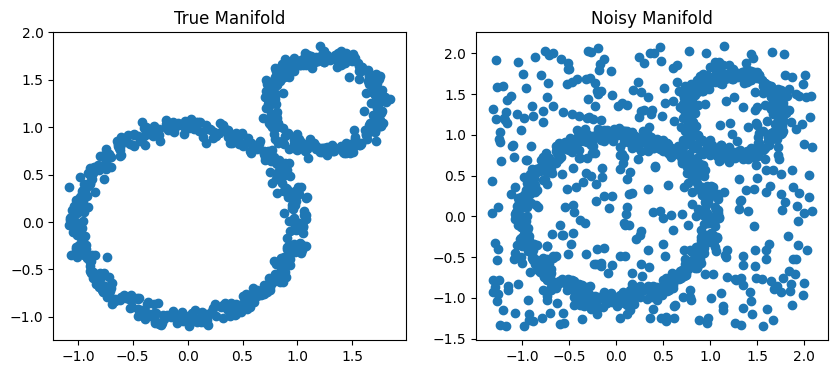

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(x=true_manifold[:, 0], y=true_manifold[:, 1])
axs[0].set_title('True Manifold')
axs[1].scatter(x=noisy_manifold[:, 0], y=noisy_manifold[:, 1])
axs[1].set_title('Noisy Manifold')
plt.show()

In [11]:
# Get the minimum density
_, props, _ = kde_fit(noisy_manifold, k=1, eps=0)
min_dens = props[2]
# KDE samples with no thresholding
kde_fit_nothresh, props_nothresh_, bounding_box_ = kde_fit(noisy_manifold, k=1, eps=min_dens)
kde_samples_nothresh, _= kde_sample(kde=kde_fit_nothresh, proposals=props_nothresh_, bounding_box=bounding_box_, num_samples=n_samples) 
# KDE samples with thresholding
kde_fit_thresh, props_thresh_, bounding_box_ = kde_fit(noisy_manifold, k=1, eps=min_dens-.55)
kde_samples_thresh, _= kde_sample(kde=kde_fit_thresh, proposals=props_thresh_, bounding_box=bounding_box_, num_samples=n_samples) 

In [12]:
# Write the three data forms to files for use in the KDE filtration in R
pd.DataFrame(kde_samples_thresh).to_csv('../data/graphicalabstract/thresholded_data.csv')
pd.DataFrame(noisy_manifold).to_csv('../data/graphicalabstract/noisy_manifold.csv')
pd.DataFrame(kde_samples_nothresh).to_csv('../data/graphicalabstract/non_thresholded_data.csv')